# Assignment: Affection status visualizer 

#### Team 1: Mateusz Czarnecki, Jani Peltonen, Amal Kayed

In [1]:
import nltk
import urllib.request
import math
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')
#nltk.download('vader_lexicon')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import string

In [17]:
text = open('data/Memoirs_of_Fanny_Hill.txt', encoding='utf-8').read()

In [3]:
text = nltk.sent_tokenize(text)  
text 

['I sit down to give you an undeniable proof of my considering your\ndesires as indispensable orders.',
 'Ungracious then as the task may be, I\nshall recall to view those scandalous stages of my life, out of which I\nemerged, at length, to the enjoyment of every blessing in the power of\nlove, health and fortune to bestow; whilst yet in the flower of youth,\nand not too late to employ the leisure afforded me by great ease and\naffluence, to cultivate an understanding, naturally not a despicable\none, and which had, even amidst the whirl of loose pleasures I had been\ntossed in, exerted more observation on the characters and manners of\nthe world than what is common to those of my unhappy profession, who,\nlooking on all though or reflection as their capital enemy, keep it at\nas great a distance as they can, or destroy it without mercy.',
 'Hating, as I mortally do, all long unnecessary prefaces, I shall give\nyou good quarter in this, and use no farther apology, than to prepare\nyou 

In [4]:
df = pd.DataFrame(text, columns =['sentences'])
df

,sentences
0,I sit down to give you an undeniable proof of ...
1,"Ungracious then as the task may be, I\nshall r..."
2,"Hating, as I mortally do, all long unnecessary..."
3,Truth!
4,"stark, naked truth, is the word; and I will no..."
...,...
1544,General Information About Project Gutenberg-tm...
1545,"For forty years, he produced and\ndistributed ..."
1546,Project Gutenberg-tm eBooks are often created ...
1547,"Thus, we do not\nnecessarily keep eBooks in co..."


In [5]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    return(text)
df["sentences_clean"] = df["sentences"].apply(lambda x: clean_text(x))
df

,sentences,sentences_clean
0,I sit down to give you an undeniable proof of ...,"[sit, give, undeniable, proof, considering, yo..."
1,"Ungracious then as the task may be, I\nshall r...","[ungracious, task, may, i\nshall, recall, view..."
2,"Hating, as I mortally do, all long unnecessary...","[hating, mortally, long, unnecessary, prefaces..."
3,Truth!,[truth]
4,"stark, naked truth, is the word; and I will no...","[stark, naked, truth, word, much, take\nthe, p..."
...,...,...
1544,General Information About Project Gutenberg-tm...,"[general, information, project, gutenberg-tm, ..."
1545,"For forty years, he produced and\ndistributed ...","[forty, years, produced, and\ndistributed, pro..."
1546,Project Gutenberg-tm eBooks are often created ...,"[project, gutenberg-tm, ebooks, often, created..."
1547,"Thus, we do not\nnecessarily keep eBooks in co...","[thus, not\nnecessarily, keep, ebooks, complia..."


## First, we are going to use the polarity scores function to calculate the score of each sentence

In [16]:
#creating new column scores using polarity scores function
sia= SentimentIntensityAnalyzer()
df['sentiments']=df['sentences'].apply(lambda Sentences: sia.polarity_scores(str(Sentences)))

In [7]:
df['compound']=df['sentiments'].apply(lambda score_dict:score_dict['compound'])
df.head()
df['pos']=df['sentiments'].apply(lambda pos_dict:pos_dict['pos'])
df.head()
df['neg']=df['sentiments'].apply(lambda neg_dict:neg_dict['neg'])
df['neu']=df['sentiments'].apply(lambda neu_dict:neu_dict['neu'])
df.head()

,sentences,sentences_clean,sentiments,compound,pos,neg,neu
0,I sit down to give you an undeniable proof of ...,"[sit, give, undeniable, proof, considering, yo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,"Ungracious then as the task may be, I\nshall r...","[ungracious, task, may, i\nshall, recall, view...","{'neg': 0.111, 'neu': 0.733, 'pos': 0.155, 'co...",0.8398,0.155,0.111,0.733
2,"Hating, as I mortally do, all long unnecessary...","[hating, mortally, long, unnecessary, prefaces...","{'neg': 0.158, 'neu': 0.69, 'pos': 0.152, 'com...",-0.0772,0.152,0.158,0.690
3,Truth!,[truth],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3802,1.000,0.000,0.000
4,"stark, naked truth, is the word; and I will no...","[stark, naked, truth, word, much, take\nthe, p...","{'neg': 0.117, 'neu': 0.863, 'pos': 0.02, 'com...",-0.8500,0.020,0.117,0.863


In [15]:
df['pos-neg'] = df.apply(lambda x: x['pos'] - x['neg'], axis=1)

In [9]:
df['delta3'] = df['pos-neg'].rolling(3).mean()
#df.dropna(inplace=True)
pd.options.mode.chained_assignment = None
df

,sentences,sentences_clean,sentiments,compound,pos,neg,neu,pos-neg,delta3
0,I sit down to give you an undeniable proof of ...,"[sit, give, undeniable, proof, considering, yo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000,NaN
1,"Ungracious then as the task may be, I\nshall r...","[ungracious, task, may, i\nshall, recall, view...","{'neg': 0.111, 'neu': 0.733, 'pos': 0.155, 'co...",0.8398,0.155,0.111,0.733,0.044,NaN
2,"Hating, as I mortally do, all long unnecessary...","[hating, mortally, long, unnecessary, prefaces...","{'neg': 0.158, 'neu': 0.69, 'pos': 0.152, 'com...",-0.0772,0.152,0.158,0.690,-0.006,0.012667
3,Truth!,[truth],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3802,1.000,0.000,0.000,1.000,0.346000
4,"stark, naked truth, is the word; and I will no...","[stark, naked, truth, word, much, take\nthe, p...","{'neg': 0.117, 'neu': 0.863, 'pos': 0.02, 'com...",-0.8500,0.020,0.117,0.863,-0.097,0.299000
...,...,...,...,...,...,...,...,...,...
1544,General Information About Project Gutenberg-tm...,"[general, information, project, gutenberg-tm, ...","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.6486,0.155,0.000,0.845,0.155,0.249333
1545,"For forty years, he produced and\ndistributed ...","[forty, years, produced, and\ndistributed, pro...","{'neg': 0.115, 'neu': 0.75, 'pos': 0.135, 'com...",0.1027,0.135,0.115,0.750,0.020,0.150667
1546,Project Gutenberg-tm eBooks are often created ...,"[project, gutenberg-tm, ebooks, often, created...","{'neg': 0.079, 'neu': 0.855, 'pos': 0.066, 'co...",-0.1043,0.066,0.079,0.855,-0.013,0.054000
1547,"Thus, we do not\nnecessarily keep eBooks in co...","[thus, not\nnecessarily, keep, ebooks, complia...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000,0.002333


## Now, we are going to calculate the Score by the number of positive words - the number of negative words and finding the words in the predefined data file

In [10]:
pos = open('data/positive.txt','r').read().split()
neg = open('data/negative.txt','r').read().split()

In [11]:
sentences = df['sentences'].values
score_array = []

for i in range(len(sentences)):
    score=0
    words = sentences[i].split()
    for word in words:
        if word in pos:
            score += 1
        if word in neg:
            score -= 1
    score_array.append(score)
    
df['Score'] = score_array
df['ScoreDelta3'] = df['Score'].rolling(3).mean()
df

,sentences,sentences_clean,sentiments,compound,pos,neg,neu,pos-neg,delta3,Score,ScoreDelta3
0,I sit down to give you an undeniable proof of ...,"[sit, give, undeniable, proof, considering, yo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000,NaN,0,NaN
1,"Ungracious then as the task may be, I\nshall r...","[ungracious, task, may, i\nshall, recall, view...","{'neg': 0.111, 'neu': 0.733, 'pos': 0.155, 'co...",0.8398,0.155,0.111,0.733,0.044,NaN,1,NaN
2,"Hating, as I mortally do, all long unnecessary...","[hating, mortally, long, unnecessary, prefaces...","{'neg': 0.158, 'neu': 0.69, 'pos': 0.152, 'com...",-0.0772,0.152,0.158,0.690,-0.006,0.012667,1,0.666667
3,Truth!,[truth],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3802,1.000,0.000,0.000,1.000,0.346000,0,0.666667
4,"stark, naked truth, is the word; and I will no...","[stark, naked, truth, word, much, take\nthe, p...","{'neg': 0.117, 'neu': 0.863, 'pos': 0.02, 'com...",-0.8500,0.020,0.117,0.863,-0.097,0.299000,-1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1544,General Information About Project Gutenberg-tm...,"[general, information, project, gutenberg-tm, ...","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.6486,0.155,0.000,0.845,0.155,0.249333,2,0.666667
1545,"For forty years, he produced and\ndistributed ...","[forty, years, produced, and\ndistributed, pro...","{'neg': 0.115, 'neu': 0.75, 'pos': 0.135, 'com...",0.1027,0.135,0.115,0.750,0.020,0.150667,-1,0.333333
1546,Project Gutenberg-tm eBooks are often created ...,"[project, gutenberg-tm, ebooks, often, created...","{'neg': 0.079, 'neu': 0.855, 'pos': 0.066, 'co...",-0.1043,0.066,0.079,0.855,-0.013,0.054000,0,0.333333
1547,"Thus, we do not\nnecessarily keep eBooks in co...","[thus, not\nnecessarily, keep, ebooks, complia...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000,0.002333,0,-0.333333


## We plot the delta scores of both approaches

<AxesSubplot:>

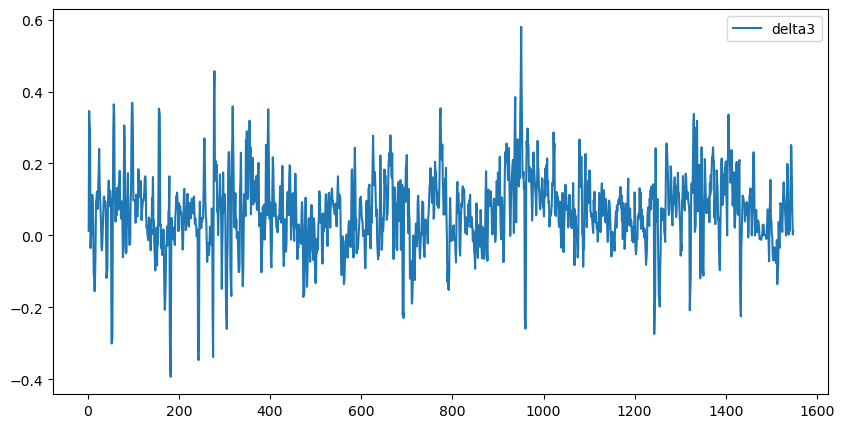

In [12]:
df[['delta3']].plot(label='RELIANCE',
                                  figsize=(10, 5))

<AxesSubplot:>

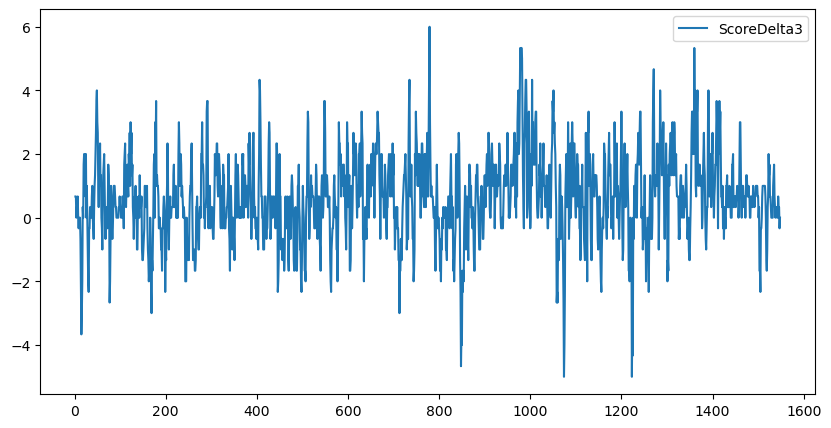

In [13]:
df[['ScoreDelta3']].plot(label='RELIANCE',
                                  figsize=(10, 5))

## In the end, we show the total number of positive and negative and neutral words in the whole text

In [14]:
# calculate the total of positive, negative and neutral words in whole the text using the compound parameter
len=df.shape
(rows,cols)=len
pos=0
neg=0
neutral=0
for i in range(0,rows):
    if df.loc[i][3]>0:
        pos=pos+1
    if df.loc[i][3]==0:
        neutral=neutral+1
    if df.loc[i][3]<0:
        neg=neg+1
print("Positive :"+str(pos) + "  Negative :" + str(neg) + "   Neutral :"+ str(neutral))

Positive :992  Negative :370   Neutral :187
